In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
(train_x, train_y), (test_x, test_y) = cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


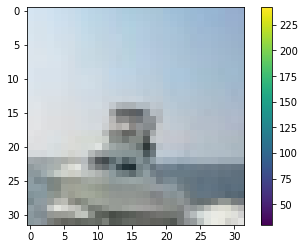

In [ ]:
plt.imshow(train_x[100])
plt.colorbar()

In [ ]:
print(train_y[100])

[8]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

In [ ]:
train_x = train_x.astype('float32')
test_x = test_x.astype('float32')

In [ ]:
train_x = train_x/255
test_x = test_x/255

In [ ]:
train_y = to_categorical(train_y, num_classes=10)
test_y = to_categorical(test_y, num_classes=10)

In [ ]:
print(train_y[100])

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [ ]:
model = Sequential()

model.add(Conv2D(28, (3,3), input_shape = (32,32,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(Conv2D(28, (3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
sgd = SGD(lr = 0.01, momentum=0.9)

model.compile(loss = 'categorical_crossentropy', optimizer=sgd, metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 28)        784       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 28)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 28)        7084      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 28)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1792)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               9

In [ ]:
model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=10, batch_size=64)

Epoch 1/10
782/782 [==============================] - 77s 98ms/step - loss: 1.7232 - accuracy: 0.3827 - val_loss: 1.4998 - val_accuracy: 0.4590
Epoch 2/10
782/782 [==============================] - 75s 95ms/step - loss: 1.3284 - accuracy: 0.5243 - val_loss: 1.2479 - val_accuracy: 0.5439
Epoch 3/10
782/782 [==============================] - 75s 96ms/step - loss: 1.1686 - accuracy: 0.5838 - val_loss: 1.1552 - val_accuracy: 0.5861
Epoch 4/10
782/782 [==============================] - 74s 95ms/step - loss: 1.0547 - accuracy: 0.6235 - val_loss: 1.0199 - val_accuracy: 0.6338
Epoch 5/10
782/782 [==============================] - 75s 96ms/step - loss: 0.9623 - accuracy: 0.6608 - val_loss: 0.9733 - val_accuracy: 0.6592
Epoch 6/10
782/782 [==============================] - 75s 96ms/step - loss: 0.8726 - accuracy: 0.6920 - val_loss: 0.9533 - val_accuracy: 0.6654
Epoch 7/10
782/782 [==============================] - 75s 96ms/step - loss: 0.8067 - accuracy: 0.7157 - val_loss: 0.9337 - val_accuracy:

In [ ]:
loss, accuracy = model.evaluate(test_x, test_y)

313/313 [==============================] - 5s 16ms/step - loss: 0.9196 - accuracy: 0.6938


In [ ]:
from PIL import Image

img = Image.open('/content/bird.jpg')

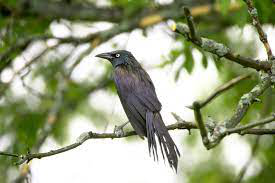

In [ ]:
img

In [ ]:
import numpy as np

In [ ]:
img1 = img.resize((32,32))

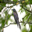

In [ ]:
img1

In [ ]:
img1 = np.expand_dims(img1, axis = 0)

In [ ]:
img1

array([[[[ 52,  63,   6],
         [ 61,  87,  13],
         [ 57,  66,  32],
         ...,
         [ 64,  84,  17],
         [ 56,  95,   3],
         [ 53,  78,   5]],

        [[ 26,  29,   7],
         [ 56,  61,  18],
         [ 47,  54,  19],
         ...,
         [ 82,  96,  55],
         [ 54,  92,   7],
         [ 62,  92,   5]],

        [[ 11,  23,   5],
         [ 47,  46,  14],
         [ 36,  41,   5],
         ...,
         [ 87, 106,  58],
         [ 51,  87,   9],
         [ 53,  83,   3]],

        ...,

        [[105, 118,  73],
         [135, 147, 106],
         [171, 165, 112],
         ...,
         [210, 212, 198],
         [116, 127,  83],
         [ 58,  79,   8]],

        [[119, 127,  90],
         [175, 182, 160],
         [146, 140, 107],
         ...,
         [165, 173, 140],
         [ 73,  90,  24],
         [ 58,  78,  10]],

        [[125, 135,  87],
         [145, 151, 129],
         [ 93,  95,  73],
         ...,
         [ 86, 109,  35],
        

In [ ]:
model.predict(img1)

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 26, 26, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 13, 13, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)              

In [ ]:
sgd = SGD(lr = 0.01, momentum=0.9)

model.compile(loss = 'categorical_crossentropy', optimizer=sgd, metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
data
  train
      class1
        dog
      class2
        cat
  vald
    class1
      dog
    class2
      cat

In [ ]:
model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=10, batch_size=64)

Epoch 1/10
782/782 [==============================] - 423s 541ms/step - loss: 1.8315 - accuracy: 0.3314 - val_loss: 1.5147 - val_accuracy: 0.4499
Epoch 2/10
782/782 [==============================] - 423s 541ms/step - loss: 1.4196 - accuracy: 0.4881 - val_loss: 1.2063 - val_accuracy: 0.5619
Epoch 3/10
782/782 [==============================] - 417s 533ms/step - loss: 1.1942 - accuracy: 0.5746 - val_loss: 1.0321 - val_accuracy: 0.6455
Epoch 4/10
782/782 [==============================] - 418s 535ms/step - loss: 1.0550 - accuracy: 0.6254 - val_loss: 0.9414 - val_accuracy: 0.6720
Epoch 5/10
782/782 [==============================] - 420s 537ms/step - loss: 0.9475 - accuracy: 0.6639 - val_loss: 0.9491 - val_accuracy: 0.6705
Epoch 6/10
782/782 [==============================] - 419s 535ms/step - loss: 0.8619 - accuracy: 0.6947 - val_loss: 0.8909 - val_accuracy: 0.6954
Epoch 7/10
782/782 [==============================] - 415s 531ms/step - loss: 0.7777 - accuracy: 0.7221 - val_loss: 0.8676 -

In [ ]:
#Way to Generate Image Datasets
from tensorflow.keras.preprocessing import ImageDataGenerator

data = ImageGenerator()
train_data = data.flow_from_directory('data/train')
vald_data = data.flow_from_directory('data/vald')
